In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

What to find??
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

#### Data preparation

Note : firstly, there are multiple files of same structure and variables so we can concat them into one data frame.
    There are multiple ways to do the same some of them are as follows:
        1) DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=False)
        2) pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)

In [16]:
import os
import glob

In [21]:
files = os.path.join(r"C:\Users\LENOVO\Desktop\Start_from_zero_again\Sales_Data","*.csv")

In [22]:
files

'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\*.csv'

In [23]:
files = glob.glob(files)
files

['C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_April_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_August_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_December_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_February_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_January_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_July_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_June_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_March_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_May_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_November_2019.csv',
 'C:\\Users\\LENOVO\\Desktop\\Start_from_zero_again\\Sales_Data\\Sales_October_2019.csv',
 'C:\\Users\\LENOVO\\D

In [27]:
df = pd.concat(map(pd.read_csv,files),ignore_index=True)
df.loc[df["Order ID"] == '194094']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18382,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,"354 North St, Boston, MA 02215"


In [28]:
df[18381:18385]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
18382,194094,Lightning Charging Cable,1,14.95,04/18/19 11:08,"354 North St, Boston, MA 02215"
18383,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
18384,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"


note : all files have been concatinated. now we need to clean and check the data types to get a final data frame to work ith

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


note : as we can clearly see here there are total of 186850 entries but we only have 186305 non null data so 545 are extra rows that must be removed 

In [39]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
old_df = df

In [45]:
df = df.dropna(how="all")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [50]:
## note : lets save the intermediate df to a csv
df.to_csv(r"C:\Users\LENOVO\Desktop\Start_from_zero_again\Sales_data_all.csv",index = False)

In [53]:
## note : headers have been included in the df in between as rows so we have to delete it
df = df.loc[df["Order ID"] != "Order ID"]

In [54]:
df.loc[df["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [56]:
## note : lets save the intermediate df to a csv
df.to_csv(r"C:\Users\LENOVO\Desktop\Start_from_zero_again\Sales_data_all_months.csv",index = False)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


In [59]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [60]:
df["Product"].astype(str)

0               USB-C Charging Cable
2         Bose SoundSport Headphones
3                       Google Phone
4                   Wired Headphones
5                   Wired Headphones
                     ...            
186845        AAA Batteries (4-pack)
186846                        iPhone
186847                        iPhone
186848        34in Ultrawide Monitor
186849          USB-C Charging Cable
Name: Product, Length: 185950, dtype: object

In [69]:
## note: lets try soft conversion first
new_df = df.infer_objects()

In [70]:
new_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [71]:
new_df["Price Each"] = pd.to_numeric(new_df["Price Each"])

In [72]:
new_df.dtypes

Order ID             object
Product              object
Quantity Ordered     object
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [75]:
new_df["Order Date"] = pd.to_datetime(new_df["Order Date"])

In [76]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [82]:
df.loc[df["Order ID"] == "259357"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [83]:
new_df.loc[new_df["Order ID"] == "259357"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186849,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


In [85]:
new_df["Quantity Ordered"] = pd.to_numeric(new_df["Quantity Ordered"])

In [86]:
new_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

Note : As now we have removed nan rows and junk from the data and also converted the datatypes of the new_df we can start working with the df and clean as and when required

In [87]:
new_df.to_csv(r"C:\Users\LENOVO\Desktop\Start_from_zero_again\Sales_data_all.csv",index = False)

## Q1 : What was the best month for sales? How much was earned that month?

In [88]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [89]:
new_df["Sales"] = new_df["Quantity Ordered"] * new_df["Price Each"]

In [90]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [97]:
new_df["Month"] = new_df["Order Date"].dt.month

In [98]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [103]:
q1 = new_df.groupby(["Month"]).sum()

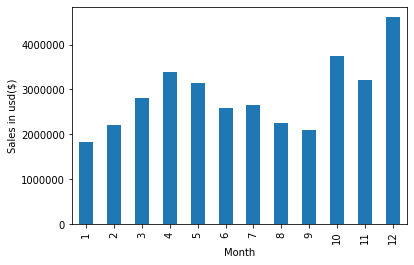

In [144]:
new_df.groupby(["Month"]).sum()['Sales'].plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Sales in usd($)')
plt.show()

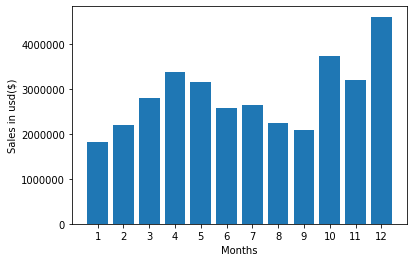

In [110]:
months = range(1,13)
plt.bar(months,q1["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in usd($)")
plt.show()

## Q2 : What city sold the most product?

In [111]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [124]:
new_df["Purchase Address"].str.split(",")[0][1]

' Dallas'

note : here we can use apply() method which allows us to run any function row by row basis

In [125]:
new_df["City"] = new_df["Purchase Address"].apply(lambda x: x.split(",")[1])

In [126]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


In [127]:
## best way in my opinion
def get_address(address):
    return address.split(",")[1]

new_df["City 2"] = new_df["Purchase Address"].apply(lambda x: get_address(x))
    

In [133]:
new_df.drop('City 2',inplace = True,axis = 1)

In [134]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


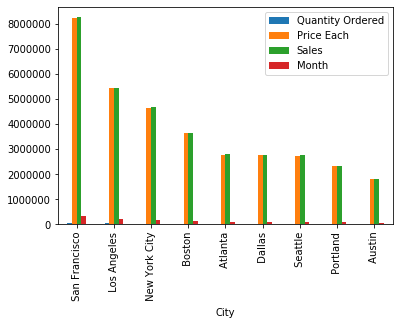

In [146]:
new_df.groupby(by="City").sum().sort_values('Sales',ascending = False).plot(kind ='bar')

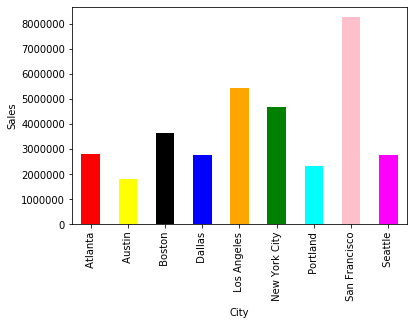

In [153]:
new_df.groupby(by="City").sum()['Sales'].plot(kind ='bar',color  = ['red', 'yellow', 'black', 'blue', 'orange','green','cyan','pink','magenta'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

## Q3 : What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [154]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles


In [158]:
new_df['Time'] = new_df["Order Date"].dt.time
new_df['Hour'] = new_df["Order Date"].dt.hour

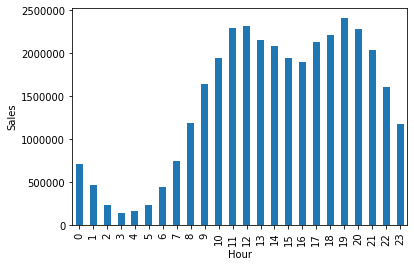

In [175]:
new_df.groupby(by="Hour").sum()['Sales'].plot(kind="bar")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.show()

## Q4 : What products are most often sold together?

In [176]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Time,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22:30:00,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14:38:00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14:38:00,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,09:27:00,9


In [184]:
new_df["Order ID"] = pd.to_numeric(new_df["Order ID"])

In [196]:
q4 = new_df[new_df["Order ID"].duplicated(keep = False)]

In [198]:
q4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Time,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14:38:00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14:38:00,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,Los Angeles,19:42:00,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,Los Angeles,19:42:00,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,Boston,11:31:00,11


In [200]:
q4['Grouped'] = q4.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
q4 = q4[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
q4[0:1]

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"


In [203]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in q4['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Q5 : What product sold the most? Why do you think it sold the most?

In [177]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Time,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,08:46:00,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22:30:00,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14:38:00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14:38:00,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,09:27:00,9


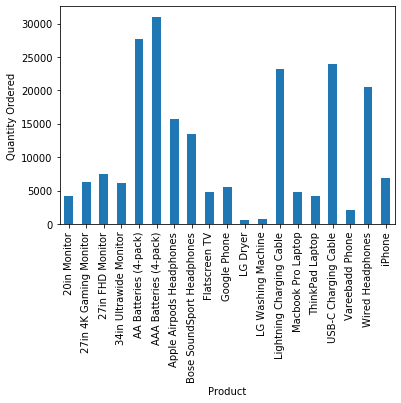

In [182]:
new_df.groupby(by = "Product").sum()["Quantity Ordered"].plot(kind = 'bar')
plt.ylabel('Quantity Ordered')
plt.show()